<a href="https://colab.research.google.com/github/mineramc/GTSRB_image_recognition/blob/master/GermanStreetSign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 99% 604M/612M [00:08<00:00, 70.3MB/s]
100% 612M/612M [00:08<00:00, 72.6MB/s]


In [ ]:
! mkdir data

In [ ]:
! unzip gtsrb-german-traffic-sign.zip -d data > /dev/null 2>&1

#**Exploratory Data Analysis**

In [ ]:
!pip install matplotlib==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 7.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = '/content/data/'
train_df = pd.read_csv(data_dir + 'Train.csv')
train_df.shape


(39209, 8)

In [ ]:
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
test_df = pd.read_csv(data_dir + 'Test.csv')
test_df.shape

(12630, 8)

In [ ]:
test_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


## Column values
Roi.X1: Upper left X-coord of the sign within the image  
Roi.Y1: Upper left Y-coord of the sign within the image  
Roi.X2: Lower right X-coord of the sign within the image  
Roi.Y2: Lower right Y-coord of the sign within the image  

In [ ]:
combined = pd.concat([train_df,test_df],axis=0, ignore_index=True)

combined.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [ ]:
combined_index = combined[['ClassId', 'Path']].groupby(['ClassId']).count().reset_index().rename(index=classes).rename(columns={'Path': "Count"}).sort_values(['Count'])


In [ ]:
combined_index.head()

,ClassId,Count
Speed limit (20km/h),0,270
Go straight or left,37,270
Dangerous curve left,19,270
End speed + passing limits,32,300
Pedestrians,27,300


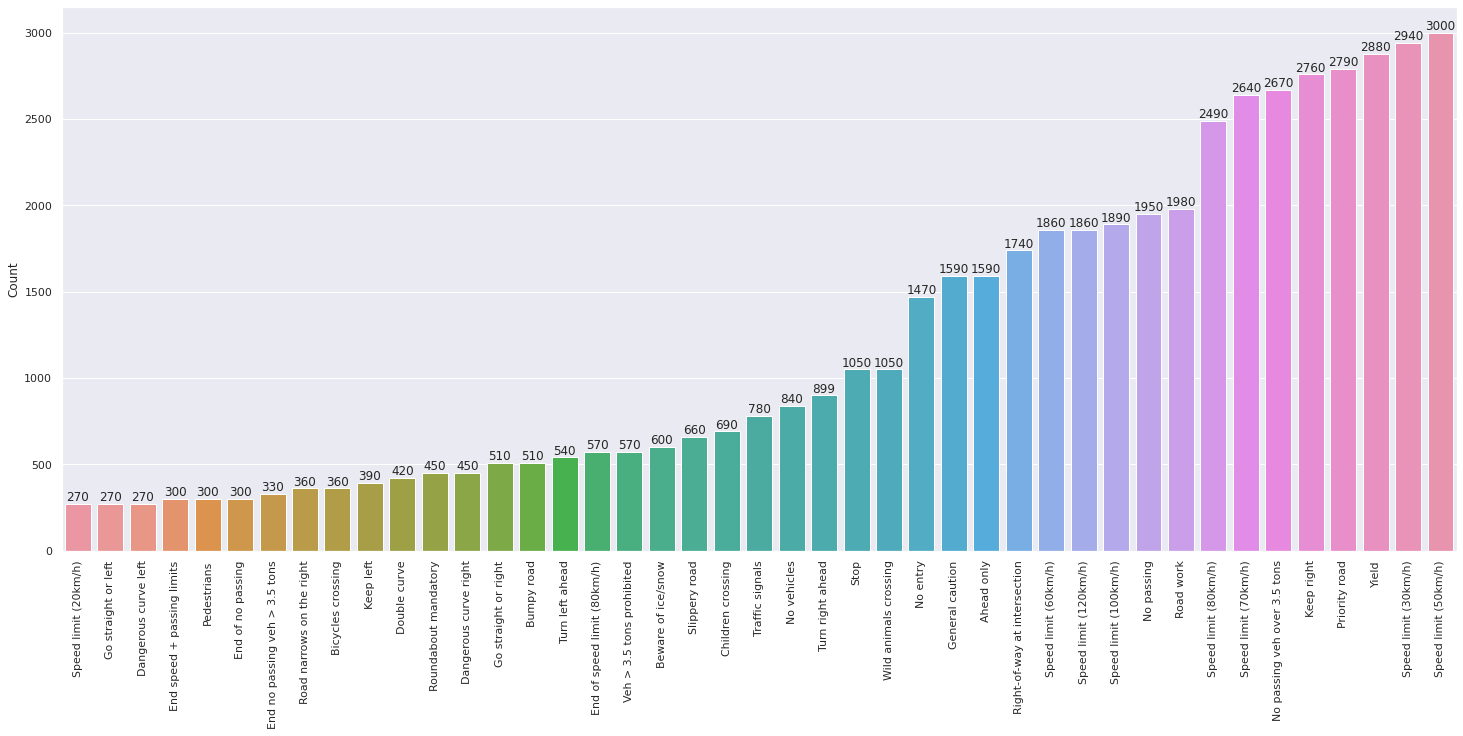

In [ ]:
sns.set(rc = {'figure.figsize':(25,10)})
plot = sns.barplot(x=combined_index.index, y=combined_index['Count'])
plt.xticks(rotation = 90)
x = plot.bar_label(plot.containers[0])
#plt.savefig("Image_Counts_BarPlot.png")

In [ ]:
import random
from matplotlib.image import imread

In [ ]:
# takes first example path for each class ID; since dataset is already ordered it just took the 1st 43 images
example_files = {}

for _, row in train_df.iterrows():
  if row['ClassId'] not in example_files:
    example_files[row['ClassId']] = row['Path']

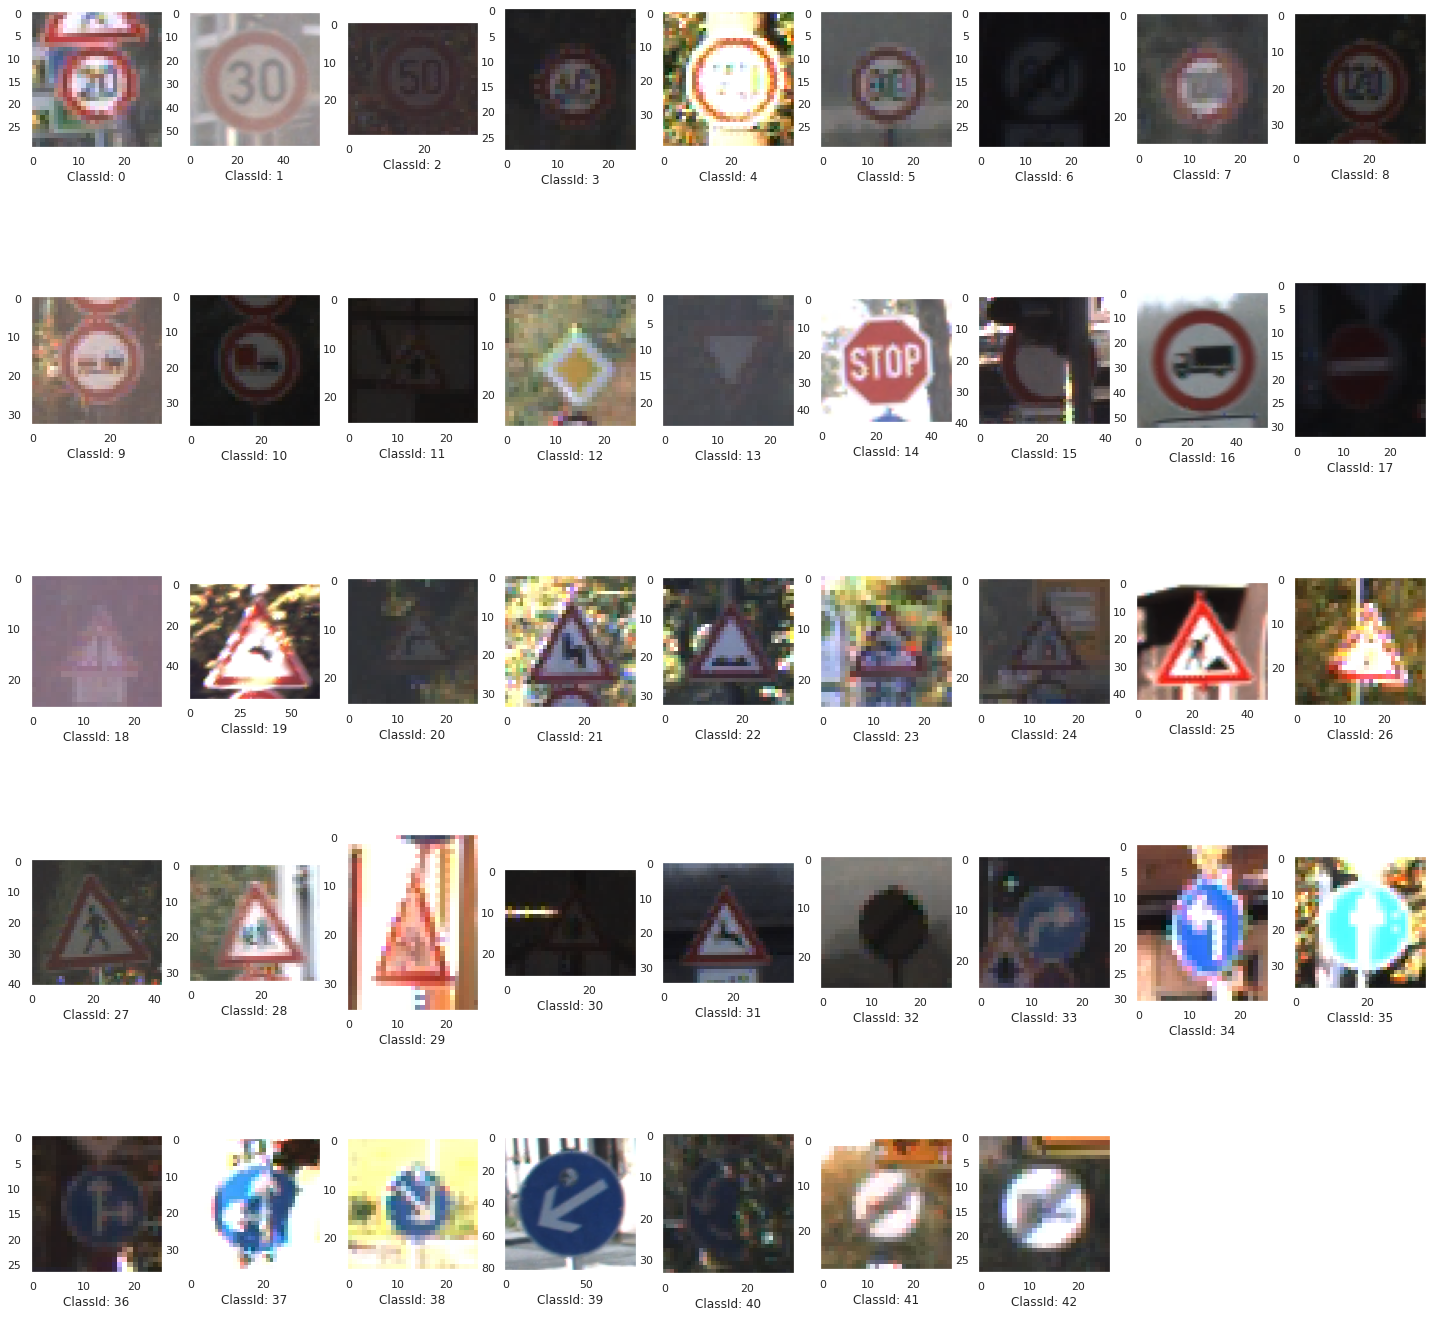

In [ ]:
plt.figure(figsize=(25,25))

# outputs image from each class ID in example files
for i in range(1,44):
    plt.subplot(5,9,i)
    img_path = data_dir + '/' + example_files[i-1]
    img = imread(img_path)
    plt.imshow(img)
    plt.grid(b=None)
    plt.xlabel("ClassId: " + str(i-1))
    #plt.xlabel(img.shape[1], fontsize = 20)#width of image
    #plt.ylabel(img.shape[0], fontsize = 20)#height of image
    #plt.savefig("Sign_imgs_By_ClassID.png")

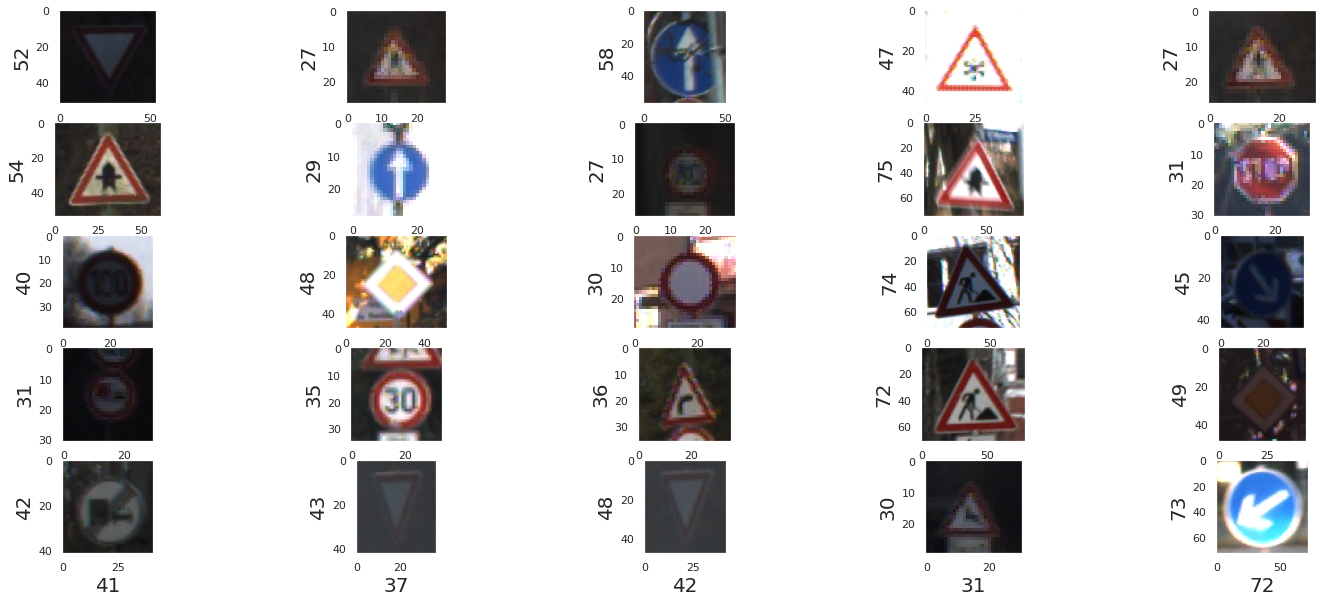

In [ ]:
imgs = test_df['Path']

#generates 25 random sign images
for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image